## Set Up

In [1]:
# python3 -m venv .venv
# source .venv/bin/activate
# pip install -r requirements.txt
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load dataframe with health features
heart_df = pd.read_csv("heart_dataset.csv")
print(heart_df.shape)

(1025, 14)


In [3]:
# target feature 1 indicates presence of heart disease
heart_df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
385,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
230,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0


In [4]:
# separate features and labels
x, y = heart_df.drop('target', axis=1), heart_df['target']
# split records into training and testing populations
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 3)

## Model Assortment

### Scale Insensitive Models

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
nb_clsfr = GaussianNB()
nb_clsfr.fit(x_train, y_train)

GaussianNB()

In [8]:
gb_clsfr = GradientBoostingClassifier()
gb_clsfr.fit(x_train, y_train)

GradientBoostingClassifier()

### Sale Sensitive Models

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Not scaling y data because model only trains on input x data
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [12]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(x_train_scaled, y_train)

LogisticRegression()

In [13]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

## Evaluate Model Accuracies

In [28]:
print("Random Forest Accuracy: " + str(forest.score(x_test, y_test)))
print("Gaussian Naive Bayes Accuracy: " + str(nb_clsfr.score(x_test, y_test)))
print("Gradient Boosting Accuracy: " + str(gb_clsfr.score(x_test, y_test)))
print("K Nearest Neighbors Accuracy: " + str(knn.score(x_test_scaled, y_test)))
print("Logistic Regression Accuracy: " + str(logr.score(x_test_scaled, y_test)))
print("SVC Accuracy: " + str(svc.score(x_test_scaled, y_test)))

Random Forest Accuracy: 0.9902597402597403
Gaussian Naive Bayes Accuracy: 0.827922077922078
Gradient Boosting Accuracy: 0.9383116883116883
K Nearest Neighbors Accuracy: 0.8668831168831169
Logistic Regression Accuracy: 0.8214285714285714
SVC Accuracy: 0.9285714285714286


In [ ]:
# Accuracy - model's overall correctness in predicting across all classes
# Precision - how often a positive prediction is correct  (minimize false positives)
# Recall - model's ability to find all positive instances (minimize false negatives)
# In heart disease context, recall may be more important than precision

In [34]:
from sklearn.metrics import recall_score
print("Recall Scores Across Models:")
y_preds = forest.predict(x_test)
print('Forest: ' + str(recall_score(y_test, y_preds)))
y_preds = nb_clsfr.predict(x_test)
print('Gaussian Naive Bayes: ' + str(recall_score(y_test, y_preds)))
y_preds = gb_clsfr.predict(x_test)
print('Gradient Boosting: ' + str(recall_score(y_test, y_preds)))
y_preds = knn.predict(x_test_scaled)
print('K Nearest Neighbors: ' + str(recall_score(y_test, y_preds)))
y_preds = logr.predict(x_test_scaled)
print('Logistic Regression: ' + str(recall_score(y_test, y_preds)))
y_preds = svc.predict(x_test_scaled)
print('SVC: ' + str(recall_score(y_test, y_preds)))

Recall Scores Across Models:
Forest: 0.9810126582278481
Gaussian Naive Bayes: 0.9113924050632911
Gradient Boosting: 0.9493670886075949
K Nearest Neighbors: 0.8924050632911392
Logistic Regression: 0.8670886075949367
SVC: 0.9620253164556962


In [ ]:
# Receiver Operating Characteristic (ROC) curve - visualizes performance of a binary classification model at various 
# thresholds by plotting the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity).
# Helps evaluate ability to differentiate positive and negative classes
# Higher Area under the Curve (AUC) means better model performance in class distinguishing

0.7014767932489452


/Users/charlotteverity/Desktop/Personal Projects/Heart Disease Classifier/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


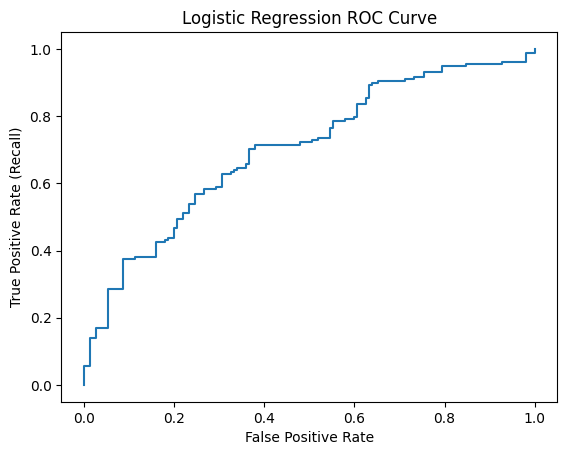

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = logr.predict_proba(x_test)[:, 1]
fpr, tpr, threshs = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Logistic Regression ROC Curve")
print(roc_auc_score(y_test, y_probs))
plt.show()

1.0


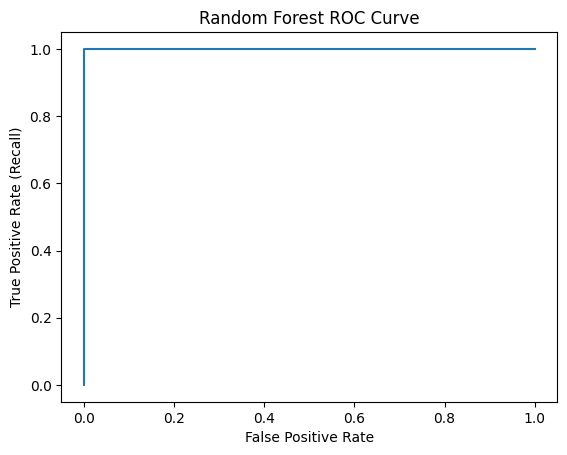

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = forest.predict_proba(x_test)[:, 1]
fpr, tpr, threshs = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Random Forest ROC Curve")
print(roc_auc_score(y_test, y_probs))
plt.show()

In [36]:
roc_auc_score(y_test, y_probs)

np.float64(1.0)

In [ ]:
# Choosing to move forward with random forest classifier because it has the 
# greatest accuracy and recall scores